Document similarity, using similarity measures, refers to the process of determining how closely two documents resemble each other by calculating a numerical value based on their shared words and their frequency, often using techniques like cosine similarity, Jaccard similarity, or TF-IDF to represent documents as vectors and compare them mathematically

In [ ]:
from pypdf import PdfReader
reader = PdfReader('The Subtle Art of Not Giving a F_ck-5-99.pdf')
sangf_text = ''
for i in range(10):
    sangf_text += reader.pages[i].extract_text()
print(sangf_text)           

CHAPTER 1
Don’t Try
Charles Bukowski was an alcoholic, a womanizer, a chronic
gambler, a lout, a cheapskate, a deadbeat, and on his worst
days, a poet. He’s probably the last person on earth you
would ever look to for life advice or expect to see in any sort
of self-help book.
Which is why he’s the perfect place to start.
Bukowski wanted to be a writer. But for decades his work
was rejected by almost every magazine, newspaper, journal,
agent, and publisher he submitted to. His work was horrible,
they said. Crude. Disgusting. Depraved. And as the stacks of
rejection slips piled up, the weight of his failures pushed him
deep into an alcohol-fueled depression that would follow
him for most of his life.
Bukowski had a day job as a letter-ﬁler at a post oﬃce.
He got paid shit money and spent most of it on booze. He
gambled away the rest at the racetrack. At night, he would
drink alone and sometimes hammer out poetry on his beat-
up old typewriter. Often, he’d wake up on the ﬂoor, having
pas

In [2]:
reader = PdfReader('WHY_MACHINES_LEARN.pdf')
wml_text = ''
for i in range(18,23):
    wml_text += reader.pages[i].extract_text()
print(wml_text)

WHY MACHINES LEARN
8 
apart the properties of things they see moving around them. It turns 
out that ducklings can imprint not just on the /f_i  rst living creature 
they see moving, but on inanimate things as well. Mallard duck-
lings, for example, can imprint on a pair of moving objects that are 
similar in shape or color. Speci/f_i  cally, they imprint on the relational 
concept embodied by the objects. So, if upon birth the ducklings see 
two moving red objects, they will later follow two objects of the 
same color (even if those latter objects are blue, not red), but not two 
objects of diﬀ  erent colors. In this case, the ducklings imprint on the 
idea of similarity. /T_h  ey also show the ability to discern dissimilarity. 
If the /f_i  rst moving objects the ducklings see are, for example, a cube 
and a rectangular prism, they will recognize that the objects have 
diﬀ  erent shapes and will later follow two objects that are diﬀ  erent in 
shape (a pyramid and a cone, for example

we mean a collection of strings. For example, an essay or a .txt file. Many organizations use this principle of document similarity to check plagiarism. It is also used by many exams conducting institutions to check if a student cheated from the other. Therefore, it is very important as well as interesting to know how all of this works.

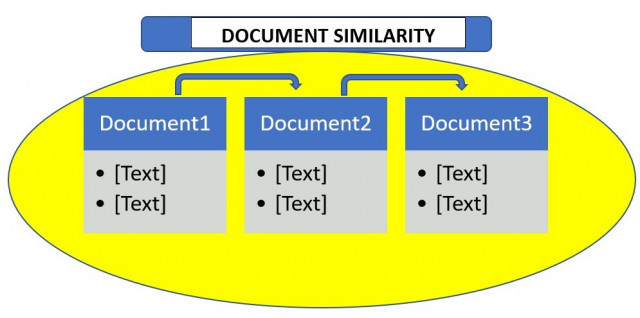

Document similarity is calculated by calculating document distance. Document distance is a concept where words(documents) are treated as vectors and is calculated as the angle between two given document vectors. Document vectors are the frequency of occurrences of words in a given document. Let’s see an example:

Say that we are given two documents D1 and D2 as:

D1: “This is a geek”

D2: “This was a geek thing”

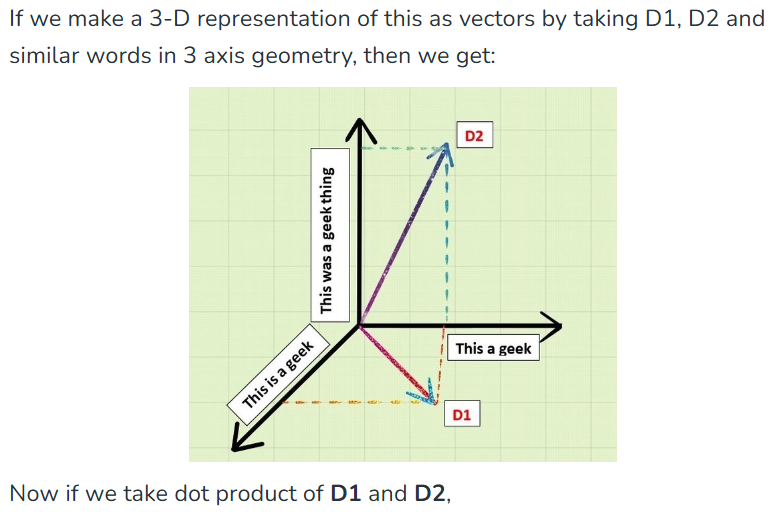

D1.D2 = "This"."This"+"is"."was"+"a"."a"+"geek"."geek"+"thing".0

D1.D2 = 1+0+1+1+0

D1.D2 = 3

cos d = D1.D2/|D1||D2|

Here d is the document distance. It’s value ranges from 0 degree to 90 degrees. Where 0 degree means the two documents are exactly identical and 90 degrees indicate that the two documents are very different.

In [3]:
import math 
import string 
import sys
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase," "*len(string.punctuation)+string.ascii_lowercase) 
def get_words_from_line_list(text):  
      
    text = text.translate(translation_table) 
    word_list = text.split() 
      
    return word_list 
# counts frequency of each word 
# returns a dictionary which maps 
# the words to  their frequency. 
def count_frequency(word_list):  
      
    D = {} 
      
    for new_word in word_list: 
          
        if new_word in D: 
            D[new_word] = D[new_word] + 1
              
        else: 
            D[new_word] = 1
              
    return D 
  
# returns dictionary of (word, frequency) 
# pairs from the previous dictionary. 
def word_frequencies_for_file(text):  
      
    word_list = get_words_from_line_list(text) 
    freq_mapping = count_frequency(word_list) 
  
    # print("text", text, ":", ) 
    print(len(text.split("\n")), "lines, ", ) 
    print(len(word_list), "words, ", ) 
    print(len(freq_mapping), "distinct words") 
    print("#"*10)
  
    return freq_mapping

def dotProduct(D1, D2):  
    Sum = 0.0
      
    for key in D1: 
          
        if key in D2: 
            Sum += (D1[key] * D2[key]) 
              
    return Sum
def vector_angle(D1, D2):  
    numerator = dotProduct(D1, D2) 
    denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2)) 
      
    return math.acos(numerator / denominator) 
def documentSimilarity(text_1, text_2): 

    sorted_word_list_1 = word_frequencies_for_file(text_1) 
    sorted_word_list_2 = word_frequencies_for_file(text_2) 
    distance = vector_angle(sorted_word_list_1, sorted_word_list_2) 
      
    print("The distance between the documents is: % 0.6f (radians)"% distance) 

documentSimilarity(sangf_text, wml_text)

335 lines, 
3241 words, 
1023 distinct words
##########
322 lines, 
3663 words, 
687 distinct words
##########
The distance between the documents is:  0.952006 (radians)


Different methods to find Document Similarity

Cosine Similarity

One of the most popular methods for calculating document similarity is Cosine Similarity. It measures the cosine of the angle between two non-zero vectors in a multi-dimensional space. In terms of text documents, these vectors often represent term frequency-inverse document frequency (TF-IDF) scores, which highlight the importance of words within documents while accounting for their commonality across other documents

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus).

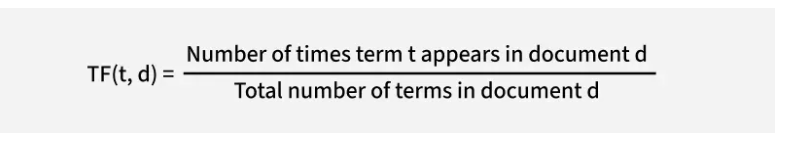 
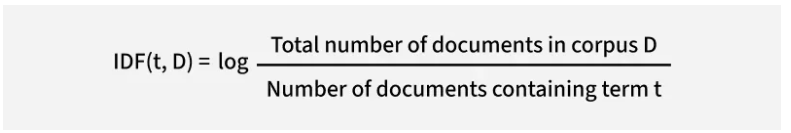

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [sangf_text, wml_text]

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Compute Cosine Similarity
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
print(similarity)

[[1.         0.47909193]]


In [5]:
# get indexing
print('\nWord indexes:')
print(tfidf_vectorizer.vocabulary_)


# in matrix form
print('\ntf-idf values in matrix form:')
print(tfidf_matrix.toarray())



Word indexes:
{'chapter': 219, 'don': 350, 'try': 1257, 'charles': 221, 'bukowski': 182, 'was': 1317, 'an': 72, 'alcoholic': 50, 'womanizer': 1357, 'chronic': 226, 'gambler': 500, 'lout': 712, 'cheapskate': 223, 'deadbeat': 303, 'and': 73, 'on': 851, 'his': 580, 'worst': 1371, 'days': 301, 'poet': 924, 'he': 562, 'probably': 951, 'the': 1208, 'last': 669, 'person': 904, 'earth': 370, 'you': 1388, 'would': 1373, 'ever': 410, 'look': 706, 'to': 1236, 'for': 478, 'life': 686, 'advice': 39, 'or': 860, 'expect': 423, 'see': 1058, 'in': 611, 'any': 82, 'sort': 1126, 'of': 846, 'self': 1062, 'help': 569, 'book': 165, 'which': 1340, 'is': 641, 'why': 1348, 'perfect': 899, 'place': 917, 'start': 1145, 'wanted': 1313, 'be': 132, 'writer': 1375, 'but': 186, 'decades': 304, 'work': 1364, 'rejected': 1011, 'by': 190, 'almost': 58, 'every': 411, 'magazine': 720, 'newspaper': 810, 'journal': 650, 'agent': 44, 'publisher': 966, 'submitted': 1171, 'horrible': 586, 'they': 1215, 'said': 1046, 'crude': 

Jaccard Similarity

Jaccard Similarity measures similarity by comparing the set of tokens in each document. It’s defined as the size of the intersection divided by the size of the union of the sample sets.

Implementation:

1) Tokenize the documents into sets of unique words.
2) Calculate the ratio of the intersection to the union of these sets.

In [6]:
def jaccard_similarity(doc1, doc2):
    words_doc1 = set(doc1.lower().split())
    words_doc2 = set(doc2.lower().split())
    intersection = words_doc1.intersection(words_doc2)
    union = words_doc1.union(words_doc2)
    return float(len(intersection)) / len(union)
print(jaccard_similarity(sangf_text, wml_text))

0.10868377935554342


Euclidean Distance

Euclidean Distance, or L2 distance, measures the shortest path between points in a vector space. For document similarity, it assesses the direct distance between two points (document vectors) in a high-dimensional space, which can be insightful when documents are of similar length

Implementation:

1) Convert documents into vectors (e.g., word counts or TF-IDF).
2) Calculate the Euclidean distance between these vectors.

In [7]:
# usinf tf - idf vectorizer
from scipy.spatial import distance
tfidf_matrix = tfidf_matrix.toarray()
dist = distance.euclidean(tfidf_matrix[0], tfidf_matrix[1])
print(dist)

1.0206939489885487


In [8]:
# using word counts
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)
count_matrix = count_matrix.toarray()
dist = distance.euclidean(count_matrix[0], count_matrix[1])
print(dist) # Lower values indicate higher similarity.

315.42669512899505


In [9]:
# usind city block distance (manhattan distance)
dist = distance.cityblock(count_matrix[0], count_matrix[1])
print(dist) # Lower values indicate higher similarity.

4014


Levenshtein Distance

Levenshtein Distance, a string metric for measuring the difference between two sequences, is commonly used in spelling correction and similar applications. It quantifies the minimum number of single-character edits required to change one word into the other|

In [10]:
%pip install Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [11]:
# using levenshtein distance
import Levenshtein
dist = Levenshtein.distance(sangf_text, wml_text)
print(dist) # Lower values indicate higher similarity.

15499


In [12]:
# using user defined function/
import numpy as np
def levenshtein_distance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = np.arange(len(s1) + 1)
    for index2, char2 in enumerate(s2):
        new_distances = [index2 + 1]
        for index1, char1 in enumerate(s1):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1], distances[index1 + 1], new_distances[-1])))
        distances = new_distances
    return distances[-1]
dist = levenshtein_distance(sangf_text, wml_text)
print(dist) # Lower values indicate higher similarity.

15499


Word Mover's Distance

In [13]:
# using word mover's distance
# %pip install pyemd
# # from pyemd import emd
# from gensim.models import Word2Vec
# import gensim.downloader as api
# word2vec = api.load('word2vec-google-news-300')
# sangf_text = sangf_text.split()
# wml_text = wml_text.split()
# distance = word2vec.wmdistance(sangf_text, wml_text)
# print(distance)

Sentiment Analysis Using Pretrained NLP Libraries (TextBlob, VADER, or Flair)


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import preprocessor as p
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [18]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 1
page_size = 5

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 5 total reviews


In [19]:
df = pd.DataFrame(reviews, columns=["review"])
df.to_csv("british_airways_reviews.csv", index=False)
df.sample(5)

,review
1,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | Terrible overall, medium ser..."
3,✅ Trip Verified | I have never travelled wit...
2,"✅ Trip Verified | First the good news, the clu..."
0,✅ Trip Verified | Prior to boarding a gate a...


In [23]:
import re
def preprocess_text(text):
    # Remove "✅ Trip Verified |" if present
    text = re.sub(r'✅ Trip Verified \|\s*', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize words
    words = text.split()
    
    # Remove stopwords (optional)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Join words back into a single string
    processed_text = ' '.join(words)
    
    return processed_text



In [50]:
# df['clean_reviews']=df['review'].apply(preprocess_text)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
def clean_verified(review):
    if review[:16]=='Trip Verified | ':
        review = review[16:]
    elif review[:15]=="Not Verified | ":
        review = review[15:]
    else:
        pass
    return review
df['clean_reviews'] = df['clean_reviews'].apply(clean_verified)
def punctuation_removal(r):
    punc = '!()-[]{};:""\,<>./?@#$%^&*_~'''
    for ele in r:
        if ele in punc:
            r = r.replace(ele, "")
    return r
df['clean_reviews']=df['clean_reviews'].apply(punctuation_removal)

<>:16: SyntaxWarning: invalid escape sequence '\,'
<>:16: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_63412/581710355.py:16: SyntaxWarning: invalid escape sequence '\,'
  punc = '!()-[]{};:""\,<>./?@#$%^&*_~'''
[nltk_data] Downloading package stopwords to /home/kelvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kelvin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:

def plot_wordcloud(text):
    wordcloud = WordCloud( background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('wordcloud for review')
    plt.show() 

In [56]:
def sentiment_analyzer(review):
    sentiment = TextBlob(review)
    score = sentiment.sentiment.polarity
    subjectivity = sentiment.sentiment.subjectivity
    
    if score > 0:
        return f"positive (subjectivity: {subjectivity:.3f})"
    elif score < 0:
        return f"negative (subjectivity: {subjectivity:.3f})"
    else:
        return f"neutral (subjectivity: {subjectivity:.3f})"
    

for review in reviews:
    print(review)
    print("--->",sentiment_analyzer(review))
    print("*"*8)

prior boarding gate agent seemed pick elderly people asked check relatively small bags contrast staff member looked way boisterous group somethings large amounts luggage london gatwick marrakech british airways rather disappointing flight hours flight passengers economy offered tiny packet digestive biscuits water offered cabin crew member walking aisle bottle mineral water plastic cups claimed ran water many passengers even get miserly offering route map captain made brief announcements needed use lavatory one cabin crew member rudely drew curtain sitting behind lavatories one colleagues loudly talking boyfriends ignored elderly man struggling open small door lavatory shall add lavatory unclean water floor one concern seemingly casual approach safety demonstration disembarkation well managed either route competitive days one lot choice use british airways route
---> negative (subjectivity: 0.449)
********
flew amsterdam las vegas layover heathrow november day flying weather wasnt grea

Word cloud: A word cloud is a visual representation of a collection of words, where the size of each word indicates its frequency or importance within the text or dataset being analyzed.

prior boarding gate agent seemed pick elderly people asked check relatively small bags contrast staff member looked way boisterous group somethings large amounts luggage london gatwick marrakech british airways rather disappointing flight hours flight passengers economy offered tiny packet digestive biscuits water offered cabin crew member walking aisle bottle mineral water plastic cups claimed ran water many passengers even get miserly offering route map captain made brief announcements needed use lavatory one cabin crew member rudely drew curtain sitting behind lavatories one colleagues loudly talking boyfriends ignored elderly man struggling open small door lavatory shall add lavatory unclean water floor one concern seemingly casual approach safety demonstration disembarkation well managed either route competitive days one lot choice use british airways route


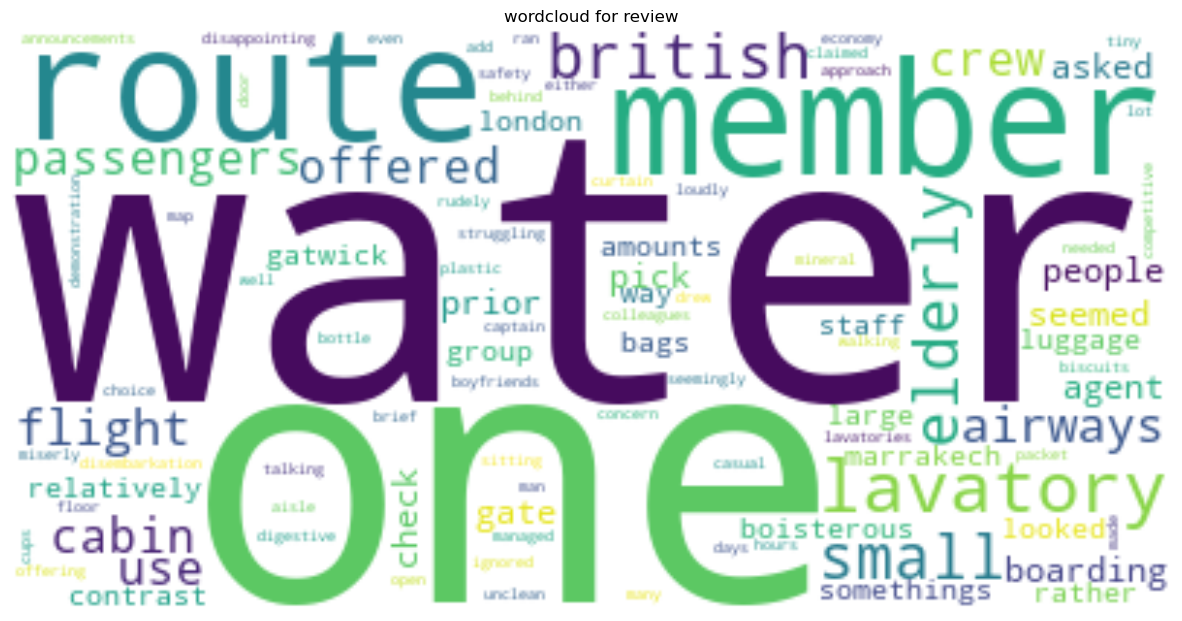

---> (Polarity: -0.7269) (subjectivity: 0.088)
********
flew amsterdam las vegas layover heathrow november day flying weather wasnt great since business really needed get las vegas anticipated checked early flight still leaving would ample time catch earlier flight heathrow even take train checked according google flight delayed would miss connection according staff british airways flight delayed reason panic got airport still nothing wrong connection hour supposed leave announced plane wasnt yet would major delay called customer service told us go london see wanted kind assurance could placed hotel since would making connecting flight refused give end found direct flight next day convinced british airways book us even though wanted connect us additional layovers resulted approximately hour delay trip way back home lost luggage gate took approximately hours find wrong gate way back tried check online portal colleague able check fine couldnt afraid overbooked contacted customer service 

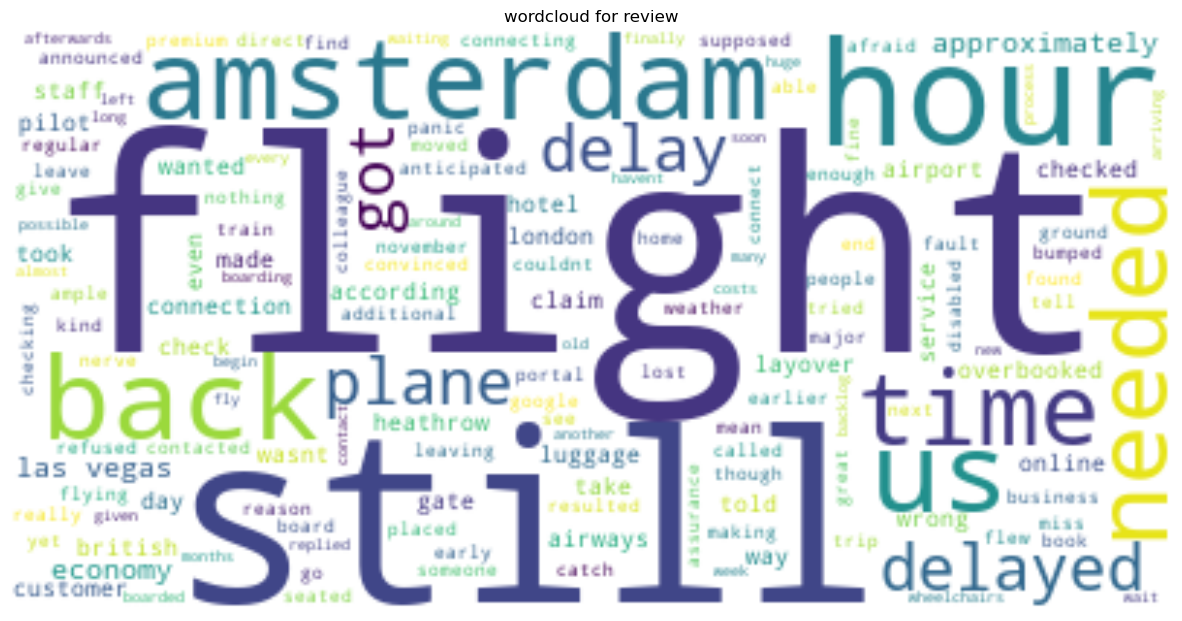

---> (Polarity: -0.9029) (subjectivity: 0.087)
********
first good news club suites huge improvement old business seats hope never see one good news im afraid say flight food really gone downhill since last flight presumably cost cutting measure airlines offer really decent quality meal cant airline bas stature ive always thought good crew make shortcomings time crew member looking could bored obviously going motions couldnt even bothered say cheerio im sure would answered heres hoping return satisfying experience


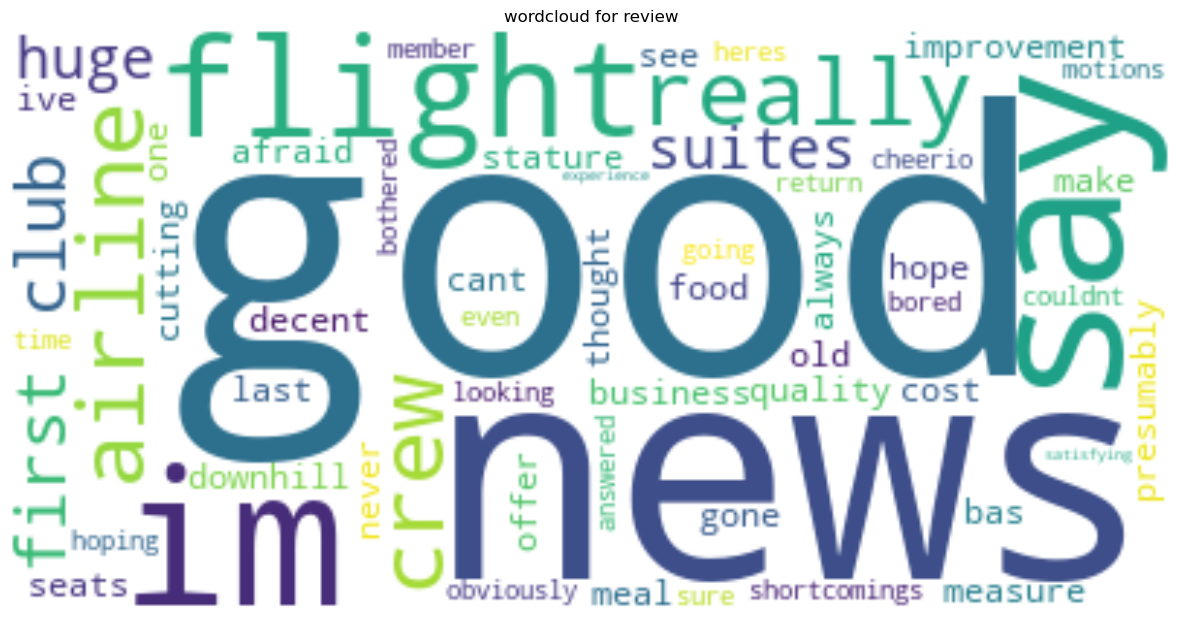

---> (Polarity: 0.9599) (subjectivity: 0.179)
********
never travelled british airways first time chose travel ba due cheapest fare available time bit unsure enjoy travel journey due mixed reviews would like express extreme joy satisfaction travelling amazing airline havent seen great efficient friendly service cabin crew would like personally thanks ellie adam professional kind food served delicious drinks good say thoroughly enjoyed flight hesitate recommend anyone try


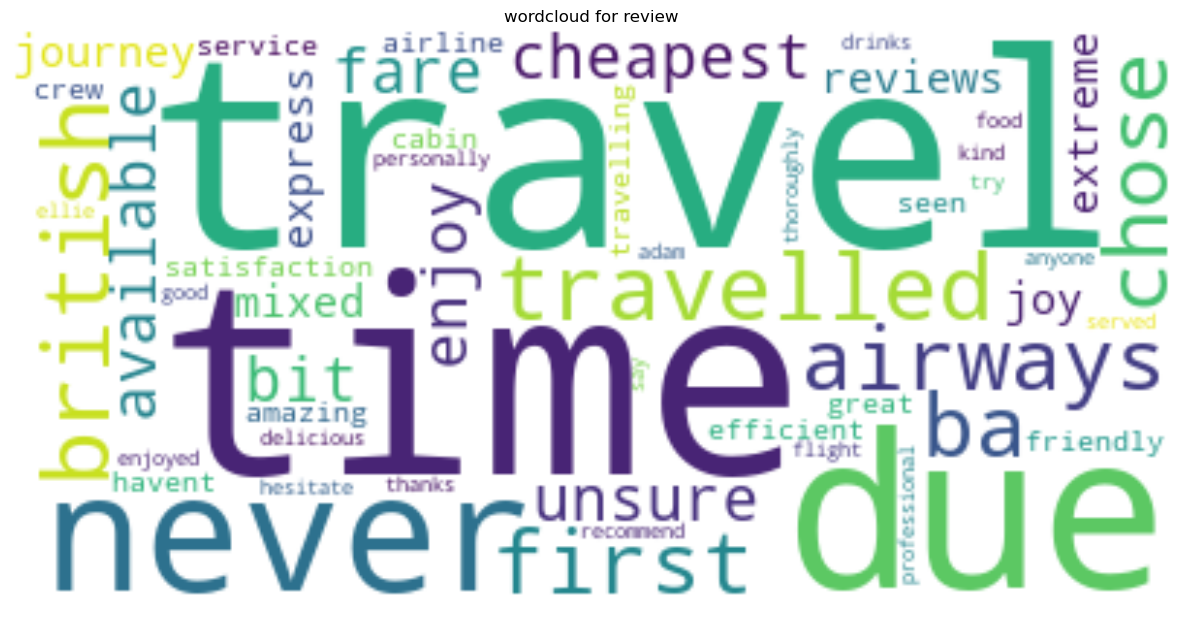

---> (Polarity: 0.9855) (subjectivity: 0.273)
********
terrible overall medium service flight delayed help reschedule connecting flight customer support terrible request compensation still pending one year


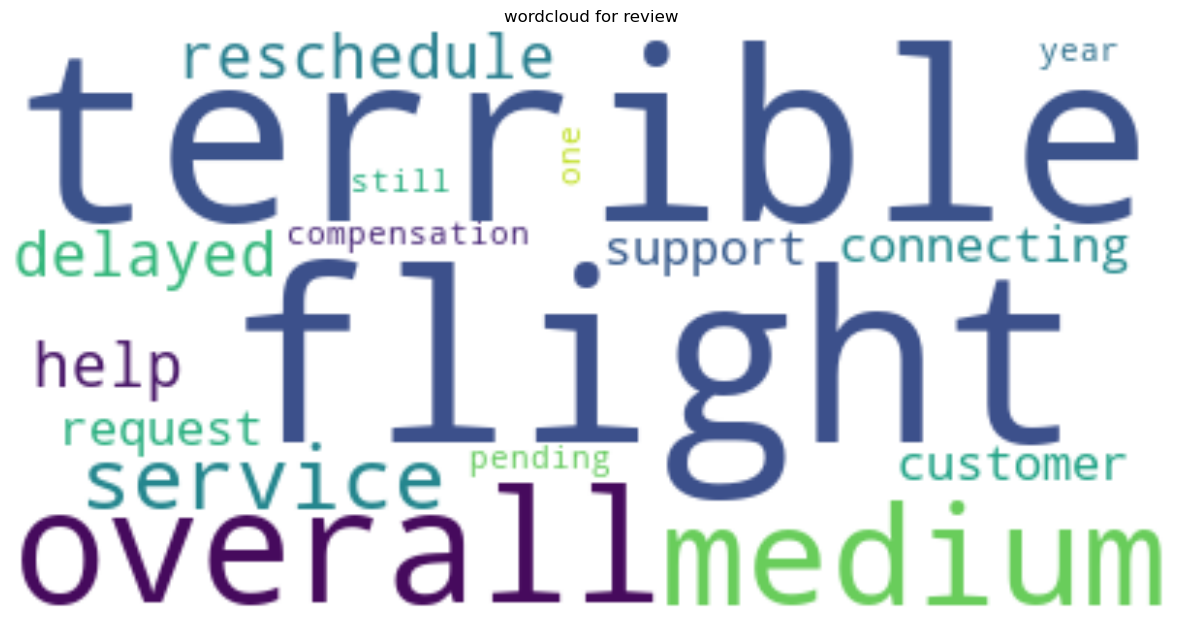

---> (Polarity: -0.4019) (subjectivity: 0.245)
********


In [64]:
# using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment_Vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    polarity = sentiment_scores['compound']  # Overall sentiment score
    subjectivity = (sentiment_scores['pos'] + sentiment_scores['neg']) / 2  # Approximate subjectivity
    return f"(Polarity: {polarity}) (subjectivity: {subjectivity:.3f})"

for review in reviews:
    print(review)
    plot_wordcloud(review)
    print("--->",analyze_sentiment_Vader(review))
    print("*"*8)


Sentiment Analysis Using Bayesian Classification

In [67]:
import tensorflow_datasets as tfds
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")

# Load IMDb dataset
dataset, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)

# Convert to lists
train_data, test_data = dataset["train"], dataset["test"]
X_train = [text.numpy().decode("utf-8") for text, label in train_data]
y_train = [label.numpy() for text, label in train_data]

X_test = [text.numpy().decode("utf-8") for text, label in test_data]
y_test = [label.numpy() for text, label in test_data]

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return " ".join(tokens)

# Apply preprocessing
# X_train_cleaned = [preprocess_text(review) for review in X_train]
# X_test_cleaned = [preprocess_text(review) for review in X_test]







[nltk_data] Downloading package stopwords to /home/kelvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kelvin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


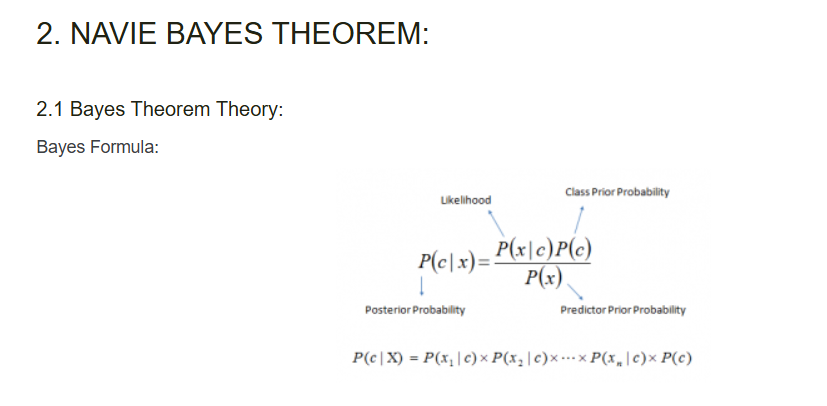

In [68]:
# Sentimental Analysis Using Naive-Bayes Classifier
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [69]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

# Train and evaluate models
models = {
    "MultinomialNB (BoW)": MultinomialNB(),
    "MultinomialNB (TF-IDF)": MultinomialNB(),
    "BernoulliNB (BoW)": BernoulliNB(),
    "BernoulliNB (TF-IDF)": BernoulliNB()
}

results = {}
for name, model in models.items():
    if "BoW" in name:
        X_train_feat, X_test_feat = X_train_bow, X_test_bow
    else:
        X_train_feat, X_test_feat = X_train_tfidf, X_test_tfidf

    metrics = train_and_evaluate(model, X_train_feat, X_test_feat, y_train, y_test)
    results[name] = metrics

# Display results
for model, (acc, prec, rec, f1) in results.items():
    print(f"{model}: Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}, F1-score={f1:.2f}")


MultinomialNB (BoW): Accuracy=0.81, Precision=0.86, Recall=0.75, F1-score=0.80
MultinomialNB (TF-IDF): Accuracy=0.83, Precision=0.87, Recall=0.77, F1-score=0.82
BernoulliNB (BoW): Accuracy=0.83, Precision=0.87, Recall=0.77, F1-score=0.82
BernoulliNB (TF-IDF): Accuracy=0.83, Precision=0.87, Recall=0.77, F1-score=0.82


Using RNN

Sentiment Analysis with an Recurrent Neural Networks (RNN)


Recurrent Neural Networks (RNN) are to the rescue when the sequence of information is needed to be captured (another use case may include Time Series, next word prediction, etc.). Due to its internal memory factor, it remembers past sequences along with current input which makes it capable to capture context rather than just individual words. 

In [1]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np


2025-02-26 14:41:18.566579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740580878.601528    3367 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740580878.610724    3367 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 14:41:18.652050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Getting reviews with words that come under 5000
# most occurring words in the entire
# corpus of textual review data
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(x_train[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


These are the index values of the words and hence we done see any reviews 

In [3]:
# Getting all the words from word_index dictionary
word_idx = imdb.get_word_index()

# Originally the index number of a value and not a key,
# hence converting the index as key and the words as values
word_idx = {i: word for word, i in word_idx.items()}

# again printing the review
print([word_idx[i] for i in x_train[0]])


['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [4]:
# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))


Max length of a review::  2697
Min length of a review::  70


We see that the longest review available is 2697 words and the shortest one is 70. While working with Neural Networks, it is important to make all the inputs in a fixed size. To achieve this objective we will pad the review sentences.

In [5]:
from tensorflow.keras.preprocessing import sequence

# Keeping a fixed length of all reviews to max 400 words
max_words = 400

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]


SimpleRNN (also called Vanilla RNN)

They are the most basic form of Recurrent Neural Networks that tries to memorize sequential information. However, they have the native problems of Exploding and Vanishing gradients

In [10]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_words))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train_, y_train_,
                        batch_size=64,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.5268 - loss: 0.6911 - val_accuracy: 0.5938 - val_loss: 0.6649
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.6117 - loss: 0.6511 - val_accuracy: 0.5938 - val_loss: 0.6608
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.6892 - loss: 0.5827 - val_accuracy: 0.7031 - val_loss: 0.6108
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.7802 - loss: 0.4722 - val_accuracy: 0.7188 - val_loss: 0.5779
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.8128 - loss: 0.4259 - val_accuracy: 0.7031 - val_loss: 0.6336
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.8201 - loss: 0.4047 - val_accuracy: 0.7812 - val_loss: 0.5280
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.7591 - loss: 0.4810 - val_accuracy: 0.6250 - val_loss: 0.7419
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.7624 - lo

In [7]:
embd_len = 32
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_words))
gru_model.add(GRU(128,
                  activation='tanh',
                  return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_,
                         batch_size=64,
                         epochs=5,
                         verbose=1,
                         validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))


/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1740580952.206626    3367 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5


2025-02-26 14:42:32.985661: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39897600 exceeds 10% of free system memory.
I0000 00:00:1740580958.079310    3796 cuda_dnn.cc:529] Loaded cuDNN version 90300


390/390 ━━━━━━━━━━━━━━━━━━━━ 46s 101ms/step - accuracy: 0.6503 - loss: 0.6479 - val_accuracy: 0.8750 - val_loss: 0.3225
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.8618 - loss: 0.3296 - val_accuracy: 0.8438 - val_loss: 0.4369
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.8918 - loss: 0.2639 - val_accuracy: 0.8750 - val_loss: 0.2654
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.9255 - loss: 0.1959 - val_accuracy: 0.8906 - val_loss: 0.2491
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.9444 - loss: 0.1521 - val_accuracy: 0.8906 - val_loss: 0.2941



2025-02-26 14:45:48.868593: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40000000 exceeds 10% of free system memory.


GRU model Score--->  [0.2888886332511902, 0.8871600031852722]


In [11]:
# Defining LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(vocab_size,
                         embd_len,
                         input_length=max_words))
lstm_model.add(LSTM(128,
                    activation='tanh',
                    return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Printing Model Summary
print(lstm_model.summary())

# Compiling the model
lstm_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history3 = lstm_model.fit(x_train_, y_train_,
                          batch_size=64,
                          epochs=7,
                          verbose=1,
                          validation_data=(x_valid, y_valid))

# Displaying the model accuracy on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.6703 - loss: 0.5924 - val_accuracy: 0.8594 - val_loss: 0.3661
Epoch 2/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.8699 - loss: 0.3228 - val_accuracy: 0.9219 - val_loss: 0.3252
Epoch 3/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.8870 - loss: 0.2860 - val_accuracy: 0.9531 - val_loss: 0.2446
Epoch 4/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.8972 - loss: 0.2638 - val_accuracy: 0.8906 - val_loss: 0.2308
Epoch 5/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.9230 - loss: 0.2046 - val_accuracy: 0.9062 - val_loss: 0.2249
Epoch 6/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.9303 - loss: 0.1869 - val_accuracy: 0.8594 - val_loss: 0.3056
Epoch 7/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9367 - loss: 0.1739 - val_accuracy: 0.9062 - val_loss: 0.2870

LSTM model Score--->  [0.3642907440662384, 0.8782399892807007]


In [9]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
                            embd_len,
                            input_length=max_words))
bi_lstm_model.add(Bidirectional(LSTM(128,
                                     activation='tanh',
                                     return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
  loss="binary_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)

# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_,
                             batch_size=64,
                             epochs=7,
                             verbose=1,
                             validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
      bi_lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "Bidirectional_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7


2025-02-26 14:50:36.224076: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39897600 exceeds 10% of free system memory.


390/390 ━━━━━━━━━━━━━━━━━━━━ 111s 276ms/step - accuracy: 0.6496 - loss: 0.5987 - val_accuracy: 0.8401 - val_loss: 0.3809
Epoch 2/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 120s 307ms/step - accuracy: 0.8660 - loss: 0.3255 - val_accuracy: 0.8619 - val_loss: 0.3298
Epoch 3/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 93s 239ms/step - accuracy: 0.9019 - loss: 0.2482 - val_accuracy: 0.8570 - val_loss: 0.3304
Epoch 4/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 66s 170ms/step - accuracy: 0.9053 - loss: 0.2399 - val_accuracy: 0.8783 - val_loss: 0.3016
Epoch 5/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 73s 186ms/step - accuracy: 0.9223 - loss: 0.1986 - val_accuracy: 0.8761 - val_loss: 0.3185
Epoch 6/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 178ms/step - accuracy: 0.9331 - loss: 0.1745 - val_accuracy: 0.8602 - val_loss: 0.3683
Epoch 7/7
390/390 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.9432 - loss: 0.1549 - val_accuracy: 0.8722 - val_loss: 0.3646

Bidirectional LSTM model Score--->  [0.36456695199012756, 0.8722400069236755]
